<a href="https://colab.research.google.com/github/laguz/DS-Unit-1-Sprint-2-Statistics/blob/master/DS_Unit_1_Sprint_Challenge_2_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 2

## Exploring Data, Testing Hypotheses

In this sprint challenge you will look at a dataset of Echocardiograms

<https://archive.ics.uci.edu/ml/datasets/Echocardiogram>

Attribute Information:

1. survival -- the number of months patient survived (has survived, if patient is still alive). Because all the patients had their heart attacks at different times, it is possible that some patients have survived less than one year but they are still alive. Check the second variable to confirm this. Such patients cannot be used for the prediction task mentioned above.
2. still-alive -- a binary variable. 0=dead at end of survival period, 1 means still alive
3. age-at-heart-attack -- age in years when heart attack occurred
4. pericardial-effusion -- binary. Pericardial effusion is fluid around the heart. 0=no fluid, 1=fluid
5. fractional-shortening -- a measure of contracility around the heart lower numbers are increasingly abnormal
6. epss -- E-point septal separation, another measure of contractility. Larger numbers are increasingly abnormal.
7. lvdd -- left ventricular end-diastolic dimension. This is a measure of the size of the heart at end-diastole. Large hearts tend to be sick hearts.
8. wall-motion-score -- a measure of how the segments of the left ventricle are moving
9. wall-motion-index -- equals wall-motion-score divided by number of segments seen. Usually 12-13 segments are seen in an echocardiogram. Use this variable INSTEAD of the wall motion score.
10. mult -- a derivate var which can be ignored
11. name -- the name of the patient (I have replaced them with "name")
12. group -- meaningless, ignore it
13. alive-at-1 -- Boolean-valued. Derived from the first two attributes. 0 means patient was either dead after 1 year or had been followed for less than 1 year. 1 means patient was alive at 1 year.

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- UCI says there should be missing data - check, and if necessary change the data so pandas recognizes it as na
- Make sure that the loaded features are of the types described above (continuous values should be treated as float), and correct as necessary

This is review, but skills that you'll use at the start of any data exploration. Further, you may have to do some investigation to figure out which file to load from - that is part of the puzzle.

In [260]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [261]:
# Loading the data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/echocardiogram/echocardiogram.data'
colnames = ['survival', 'still-alive', 'age-at-heart-attack', 'pericardial-effusion', 'fractional-shortening', 'epss', 'lvdd', 'wall-motion-score', 'wall-motion-index', 'mult', 'name', 'group', 'alive-at-1']

echocardiogram = pd.read_csv(url, names=colnames, header=None)
echocardiogram

survival still-alive age-at-heart-attack  ...  name group alive-at-1
0         11           0                  71  ...  name     1          0
1         19           0                  72  ...  name     1          0
2         16           0                  55  ...  name     1          0
3         57           0                  60  ...  name     1          0
4         19           1                  57  ...  name     1          0
..       ...         ...                 ...  ...   ...   ...        ...
127      7.5           1                  64  ...  name     ?          ?
128       41           0                  64  ...  name     ?          ?
129       36           0                  69  ...  name     ?          ?
130       22           0                  57  ...  name     ?          ?
131       20           0                  62  ...  name     ?          ?

[132 rows x 13 columns]

In [262]:
# Checking the data observation is 132
echocardiogram.shape

(132, 13)

In [263]:
echocardiogram.isnull().sum()

survival                 1
still-alive              0
age-at-heart-attack      0
pericardial-effusion     0
fractional-shortening    0
epss                     0
lvdd                     0
wall-motion-score        0
wall-motion-index        0
mult                     0
name                     0
group                    0
alive-at-1               0
dtype: int64

In [264]:
echocardiogram = echocardiogram.replace("?", np.nan)
echocardiogram

survival still-alive age-at-heart-attack  ...  name group alive-at-1
0         11           0                  71  ...  name     1          0
1         19           0                  72  ...  name     1          0
2         16           0                  55  ...  name     1          0
3         57           0                  60  ...  name     1          0
4         19           1                  57  ...  name     1          0
..       ...         ...                 ...  ...   ...   ...        ...
127      7.5           1                  64  ...  name   NaN        NaN
128       41           0                  64  ...  name   NaN        NaN
129       36           0                  69  ...  name   NaN        NaN
130       22           0                  57  ...  name   NaN        NaN
131       20           0                  62  ...  name   NaN        NaN

[132 rows x 13 columns]

In [265]:
echocardiogram = echocardiogram.replace("", np.nan)
echocardiogram

survival still-alive age-at-heart-attack  ...  name group alive-at-1
0         11           0                  71  ...  name     1          0
1         19           0                  72  ...  name     1          0
2         16           0                  55  ...  name     1          0
3         57           0                  60  ...  name     1          0
4         19           1                  57  ...  name     1          0
..       ...         ...                 ...  ...   ...   ...        ...
127      7.5           1                  64  ...  name   NaN        NaN
128       41           0                  64  ...  name   NaN        NaN
129       36           0                  69  ...  name   NaN        NaN
130       22           0                  57  ...  name   NaN        NaN
131       20           0                  62  ...  name   NaN        NaN

[132 rows x 13 columns]

## Part 2 - Exploring data, Testing hypotheses

The only thing we really know about this data is that Alive-at-1 is the class label. Besides that, we have continuous features and categorical features.

Explore the data: you can use whatever approach (tables, utility functions, visualizations) to get an impression of the distributions and relationships of the variables. In general, your goal is to understand how the features are different when grouped by the two class labels (`1` and `0`).

For the continuous features, how are they different when split between the two class labels? Choose two features to run t-tests (again split by class label) - specifically, select one feature that is *extremely* different between the classes, and another feature that is notably less different (though perhaps still "statistically significantly" different). You may have to explore more than two features to do this.

For the categorical features, explore by creating "cross tabs" (aka [contingency tables](https://en.wikipedia.org/wiki/Contingency_table)) between them and the class label, and apply the Chi-squared test to them. [pandas.crosstab](http://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html) can create contingency tables, and [scipy.stats.chi2_contingency](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html) can calculate the Chi-squared statistic for them.

There are also categorical features - as with the t-test, try to find one where the Chi-squared test returns an extreme result (rejecting the null that the data are independent), and one where it is less extreme.

**NOTE** - "less extreme" just means smaller test statistic/larger p-value. Even the least extreme differences may be strongly statistically significant.

Your *main* goal is the hypothesis tests, so don't spend too much time on the exploration/visualization piece. That is just a means to an end - use simple visualizations, such as boxplots or a scatter matrix (both built in to pandas), to get a feel for the overall distribution of the variables.

This is challenging, so manage your time and aim for a baseline of at least running two t-tests and two Chi-squared tests before polishing. And don't forget to answer the questions in part 3, even if your results in this part aren't what you want them to be.

In [266]:
# TODO

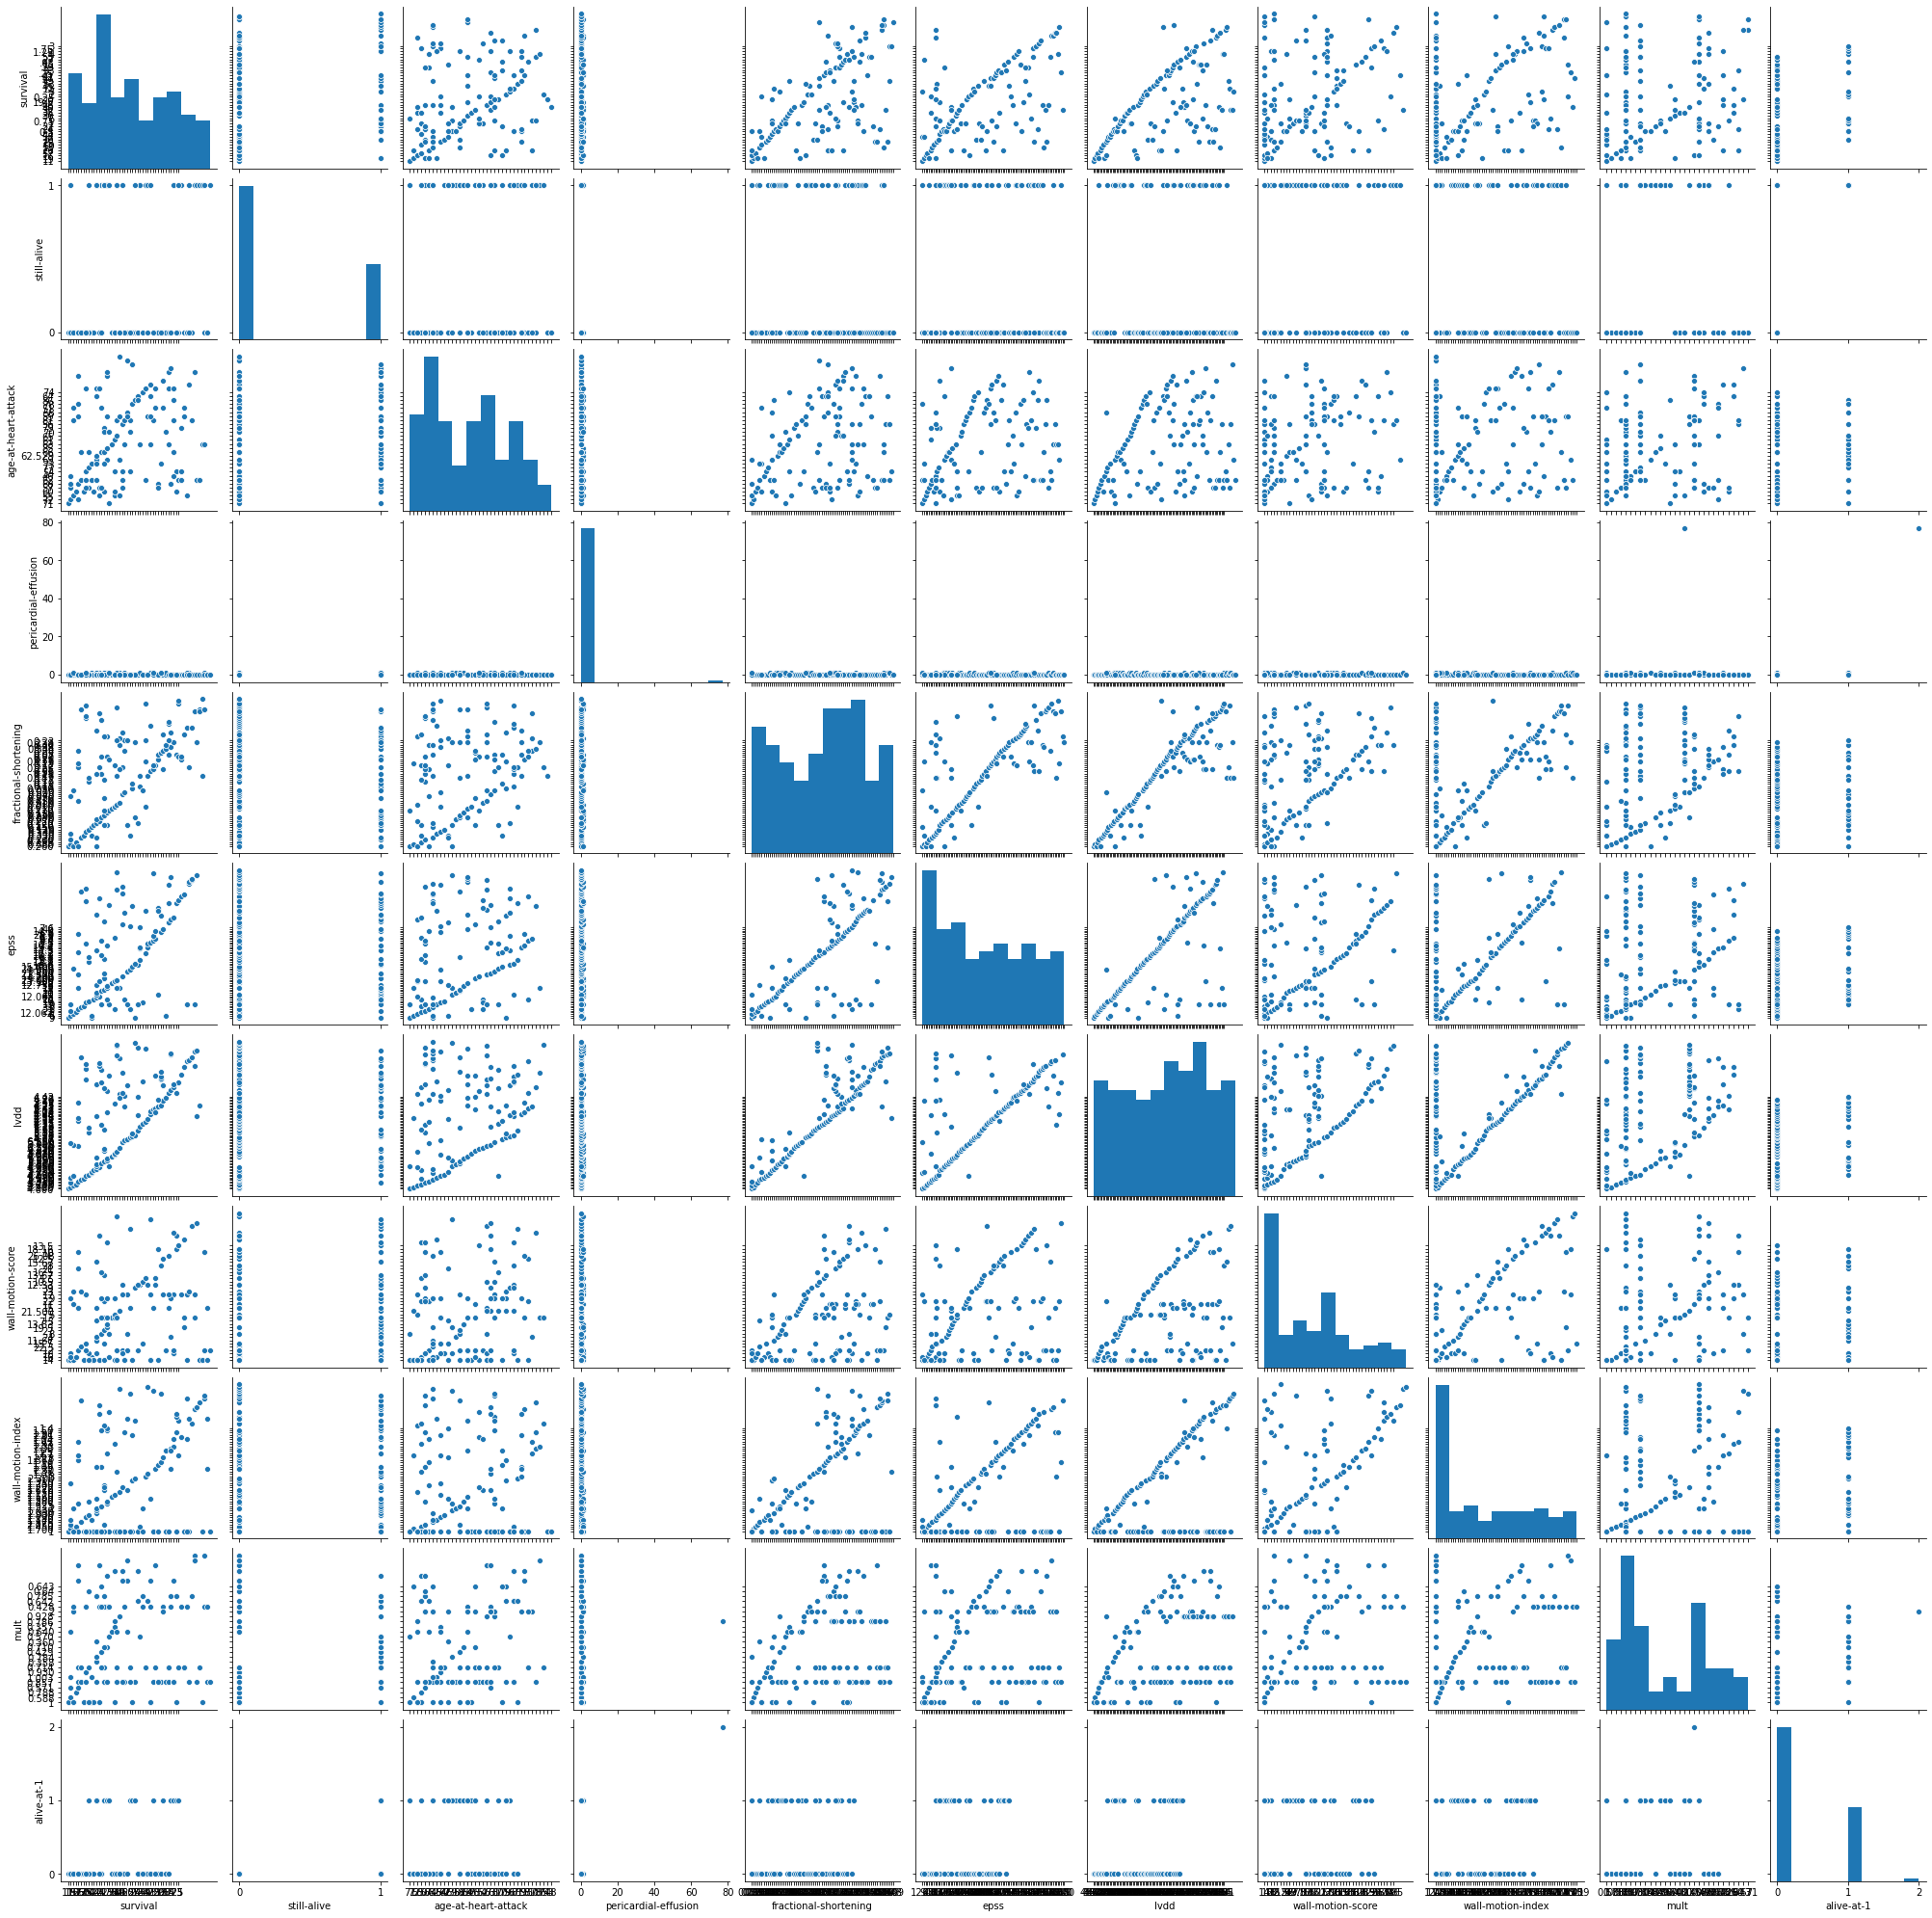

In [267]:
sns.pairplot(echocardiogram);

In [268]:
# Convert the column data to a float
echocardiogram['survival'] = echocardiogram['survival'].astype('float64')
echocardiogram['survival'].dtypes

dtype('float64')

In [269]:
# Convert the column data to a float
echocardiogram['still-alive'] = echocardiogram['still-alive'].astype('float')
echocardiogram['still-alive'].dtypes

dtype('float64')

In [270]:
# Convert the column data to a Float
echocardiogram['alive-at-1'] = echocardiogram['alive-at-1'].astype('float')

In [271]:
pd0 = echocardiogram[echocardiogram['alive-at-1'] == 0]
pd1 = echocardiogram[echocardiogram['alive-at-1'] == 1]

In [272]:
# Create the mean to do the oneside test.
mean_sur0 = pd0['still-alive'].mean()
mean_sur1 = pd1['still-alive'].mean()
print(mean_sur0)
print(mean_sur1)

0.1
1.0


In [273]:
# First 1samp t test
results1=st.ttest_1samp(echocardiogram['still-alive'], mean_sur0, nan_policy='omit')
print('statistic:{:.25f}'.format(results1[0]))
print('{:.25f}'.format(results1[1]))

statistic:5.5420099428987095180332290
0.0000001597251013617978464


In [274]:
# Secound 1samp t test
results1=st.ttest_1samp(echocardiogram['still-alive'], mean_sur1, nan_policy='omit')
print('statistic:{:.25f}'.format(results1[0]))
print('{:.25f}'.format(results1[1]))

statistic:-16.3109322734142629940379265
0.0000000000000000000000000


In [275]:
# First two samp t test
results3=st.ttest_ind(echocardiogram['alive-at-1'], echocardiogram['survival'], nan_policy='omit')
print('statistic:{:.25f}'.format(results3[0]))
print('{:.25f}'.format(results3[1]))

statistic:-11.9089629616331045269816968
0.0000000000000000000000004


In [276]:
# Second two samp t test
results4=st.ttest_ind(echocardiogram['alive-at-1'], echocardiogram['still-alive'], nan_policy='omit')
print('{:.25f}'.format(results4[1]))

0.7930971267604578489596179


In [277]:
# Create the congigency table1
contingency_table1 = pd.crosstab(echocardiogram['alive-at-1'], echocardiogram['pericardial-effusion'])
contingency_table1

pericardial-effusion  0   1   77
alive-at-1                      
0.0                   43   7   0
1.0                   16   8   0
2.0                    0   0   1

In [278]:
# Chi congigency test PValue
results5=st.chi2_contingency(contingency_table1)
print('{:.25f}'.format(results5[1]))

0.0000000000000003125643823


In [279]:
# Create the congigency table2
contingency_table2 = pd.crosstab(echocardiogram['still-alive'], echocardiogram['pericardial-effusion'])
contingency_table2

pericardial-effusion   0   1
still-alive                 
0.0                   76  12
1.0                   31  12

In [280]:
# Chi congigency test PValue
results6=st.chi2_contingency(contingency_table2)
print('{:.25f}'.format(results6[1]))

0.0814729055287725795198028


## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- Interpret and explain the two t-tests you ran - what do they tell you about the relationships between the continuous features you selected and the class labels? I did two one side t test.
I split the data if the person was alive at one year mark or no.
The null hypothesis is that been having still alive doesn't affect been alive at the one year mark.
I was able to reject the null because p was less than 0.05 for both tests.

I did two two side t test.
The null hypothesis is that surviving doesn't have an effect in been alive at the one year mark. The null was rejected because P was less than 0.05

The null hypothesis is that being still alive at one year mark doesn't affect in been still alive. The null was not rejected because P was greater than 0.05
- Interpret and explain the two Chi-squared tests you ran - what do they tell you about the relationships between the categorical features you selected and the class labels? My categorial were binary like the class label choose in this test.

I did two chi test

The null hypothesis is that being still alive is not base on been alive at the one year mark. The null was not rejected because P was greater than 0.05

The null hypothesis is that being alive at the one year mark is not based on having pericardial-effusion. The null was rejected because P was less than 0.05
I was able to see that the first 1 t test was reject by both sample mean letting me that been still alive have not correct lation of been alive at one year mark.
- What was the most challenging part of this sprint challenge? The Chi test for me.

This test was hard.

*Your words here!*

## Part 4 - Bayesian vs Frequentist Statistics

Using a minimum of 2-3 sentences, give an explanation of Bayesian and Frequentist statistics, and then compare and contrast these two approaches to statistical inference.
The Bayesian use prior probabilities to update the next sequence and Frequentist do not use the prior probabilities the used the means as a reference to assign the maximum likelihood.



*Your words here!* I didn't have the time to finish with Bayesian. Need more time to study.

# Stretch Goals: 
Do these to get a 3. These are not required in order to pass the Sprint Challenge.

## Part 1: 

Make sure that all of your dataframe columns have the appropriate data types. *Hint:* If a column has the datatype of "object" even though it's made up of float or integer values, you can coerce it to act as a numeric column by using the `pd.to_numeric()` function. In order to get a 3 on this section make sure that your data exploration is particularly well commented, easy to follow, and thorough.

## Part 2:

Write functions that can calculate t-tests and chi^2 tests on all of the appropriate column combinations from the dataset. (Remember that certain tests require certain variable types.)

## Part 3: 

Calculate and report confidence intervals on your most important mean estimates (choose at least two). Make some kind of a graphic or visualization to help us see visually how precise these estimates are.

## Part 4:

Give an extra awesome explanation of Bayesian vs Frequentist Statistics. Maybe use code or visualizations, or any other means necessary to show an above average grasp of these high level concepts.

In [281]:
# You can work the stretch goals down here or back up in their regular sections
# just make sure that they are labeled so that we can easily differentiate
# your main work from the stretch goals.